In [1]:
import torch
import os
import sys
import json
import glob


os.environ["CUDA_VISIBLE_DEVICES"] = ""
sys.path.append("../../")

from src.models.lightning_module import LitVqaModel
from src.models.vqa_model import VQAModel
from src.train import setup_parser

from PIL import Image
from transformers import AutoImageProcessor, AutoTokenizer, XLMRobertaTokenizer
from pathlib import Path

In [68]:
import time

In [ ]:
while True:
    time.sleep(1)

In [63]:
dec_tokenizer = AutoTokenizer.from_pretrained("sshleifer/student-bart-base-3-3")

In [64]:
dec_tokenizer.add_special_tokens({"additional_special_tokens": ["<s_ocr>", "</s_ocr>", "<s_q>", "</s_q>", "<s_a>", "</s_a>"]})

6

In [66]:
dec_tokenizer.additional_special_tokens_ids

[50265, 50266, 50267, 50268, 50269, 50270]

In [67]:
dec_tokenizer.additional_special_tokens

['<s_ocr>', '</s_ocr>', '<s_q>', '</s_q>', '<s_a>', '</s_a>']

In [15]:
parser = setup_parser()

In [16]:
args, _ = parser.parse_known_args()

In [10]:
model = LitVqaModel(
    {
        **vars(args),
        "num_training_samples_per_epoch": 100,
    },
    dec_tokenizer=dec_tokenizer,
    
)

Some weights of the model checkpoint at google/vit-base-patch16-224 were not used when initializing ViTModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at microsoft/layoutlm-base-uncased were not used when initializing LayoutLMModel: ['cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expect

In [12]:
model.load_from_checkpoint(
    "/home/jovyan/vol-1/BREW-1146/brew-1146-vqa-research/results/[TEST]BREW-1146-vqa/student-bart-base-3-3/epoch=18-step=46968.ckpt",
    dec_tokenizer=dec_tokenizer,
    map_location="cpu"
)

Some weights of the model checkpoint at google/vit-base-patch16-224 were not used when initializing ViTModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at microsoft/layoutlm-base-uncased were not used when initializing LayoutLMModel: ['cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expect

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /tmp/ipykernel_6231/1443900911.py:1 in <cell line: 1>                                            │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_6231/1443900911.py'                         │
│                                                                                                  │
│ /home/jovyan/.local/lib/python3.8/site-packages/lightning/pytorch/core/module.py:1531 in         │
│ load_from_checkpoint                                                                             │
│                                                                                                  │
│   1528 │   │   │   pretrained_model.freeze()                                                     │
│   1529 │   │   │   y_hat = pretrained_model(x)                                                   │
│   1530 │   │   """                                                                               │
│ ❱ 1531 │   │   loaded = _load_from_checkpoint(                                                   │
│   1532 │   │   │   cls,                                                                          │
│   1533 │   │   │   checkpoint_path,                                                              │
│   1534 │   │   │   map_location,                                                                 │
│                                                                                                  │
│ /home/jovyan/.local/lib/python3.8/site-packages/lightning/pytorch/core/saving.py:88 in           │
│ _load_from_checkpoint                                                                            │
│                                                                                                  │
│    85 │   if issubclass(cls, pl.LightningDataModule):                                            │
│    86 │   │   return _load_state(cls, checkpoint, **kwargs)                                      │
│    87 │   if issubclass(cls, pl.LightningModule):                                                │
│ ❱  88 │   │   storage = _load_state(cls, checkpoint, strict=strict, **kwargs)                    │
│    89 │   │   state_dict = checkpoint["state_dict"]                                              │
│    90 │   │   if not state_dict:                                                                 │
│    91 │   │   │   raise ValueError(f"The state dict in {checkpoint_path!r} contains no paramet   │
│                                                                                                  │
│ /home/jovyan/.local/lib/python3.8/site-packages/lightning/pytorch/core/saving.py:154 in          │
│ _load_state                                                                                      │
│                                                                                                  │
│   151 │                                                                                          │
│   152 │   # load the state_dict on the model automatically                                       │
│   153 │   assert strict is not None                                                              │
│ ❱ 154 │   keys = obj.load_state_dict(checkpoint["state_dict"], strict=strict)                    │
│   155 │                                                                                          │
│   156 │   if not strict:                                                                         │
│   157 │   │   if keys.missing_keys:                                                              │
│                                                                                                  │
│ /opt/conda/lib/python3.8/site-packages/torch/nn/modules/module.py:1604 in load_state_dict        │
│                                                            

In [17]:
model = LitVqaModel.load_from_checkpoint(
    "/home/jovyan/vol-1/BREW-1146/brew-1146-vqa-research/results/[TEST]BREW-1146-vqa/student-bart-base-3-3/epoch=18-step=46968.ckpt",
    dec_tokenizer=dec_tokenizer,
    map_location="cpu"
)

Some weights of the model checkpoint at google/vit-base-patch16-224 were not used when initializing ViTModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at microsoft/layoutlm-base-uncased were not used when initializing LayoutLMModel: ['cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expect

In [18]:
model.model.decoder.config.max_length

20

In [19]:
model.hparams["pretrained_dec"]

'sshleifer/student-bart-base-3-3'

# predict

In [20]:
# example image
sample_image_path = "/home/jovyan/vol-1/BREW-1146/brew-1146-vqa-research/src/models/samples/iphone-14.jpeg"
im = Image.open(sample_image_path)
im = im.convert("RGB")

In [21]:
seq_length = model.model.img_encoder.embeddings.patch_embeddings.num_patches + 1

In [25]:
DEFAULT_PRETRAINED_BART = model.hparams["pretrained_dec"]
DEFAULT_PRETRAINED_VIT = "google/vit-base-patch16-224"
DEFAULT_PRETRAINED_LAYOUTLM = "microsoft/layoutlm-base-uncased"

# init processor and tokenizer
image_processor = AutoImageProcessor.from_pretrained(DEFAULT_PRETRAINED_VIT)
decoder_tokenizer = dec_tokenizer
orc_text_tokenizer = AutoTokenizer.from_pretrained(DEFAULT_PRETRAINED_LAYOUTLM)

In [26]:
decoder_tokenizer.special_tokens_map

{'bos_token': '<s>',
 'eos_token': '</s>',
 'unk_token': '<unk>',
 'sep_token': '<s_answer>',
 'pad_token': '<pad>',
 'cls_token': '<s>',
 'mask_token': '<mask>'}

In [27]:
json_path = glob.glob("/home/jovyan/vol-1/BREW-1146/data/orca/tw/*/*.json")

In [28]:
img_path = Path(os.path.dirname(json_path[0])) / "img.png"

In [29]:
with open(json_path[0]) as f:
    sample = json.load(f)

In [30]:
question = sample["items"][0]["q"]
ocr_text = "nike Knee Brace".split()
normalized_word_boxes = [637, 773, 693, 782], [698, 773, 733, 782], [1000, 1000, 1000, 1000]

In [38]:
token_boxes = []
for word, box in zip(ocr_text, normalized_word_boxes):
    word_tokens = orc_text_tokenizer.tokenize(word)
    token_boxes.extend([box] * len(word_tokens))

# add bounding boxes of cls + sep tokens
token_boxes = (
    [[0, 0, 0, 0]]
    + token_boxes
    + [[1000, 1000, 1000, 1000]] * (seq_length - 1 - len(token_boxes))
)  # pad to seq_length
bbox = torch.tensor([token_boxes])

decoder_input_ids = decoder_tokenizer(
    question, add_special_tokens=False
).input_ids

decoder_input_ids = torch.LongTensor([[dec_tokenizer.bos_token_id] + decoder_input_ids + [dec_tokenizer.sep_token_id]])

ocr_text_input = orc_text_tokenizer(
    " ".join(ocr_text),
    return_tensors="pt",
    max_length=seq_length,
    padding="max_length",
)

ocr_text_input_ids = ocr_text_input["input_ids"]
ocr_text_attention_mask = ocr_text_input["attention_mask"]

pixel_values = image_processor(im, return_tensors="pt").pixel_values

In [41]:
# run forward
output = model.model.inference(
    pixel_values,
    decoder_input_ids,
    ocr_text_input_ids,
    ocr_text_attention_mask,
    bbox,
    decoder_tokenizer
)

In [48]:
decoder_input_ids

tensor([[    0,  2264,    16,     5,  1152,  2343,   116, 50265]])

In [49]:
o = model.model.decoder(decoder_input_ids, labels=decoder_input_ids)

In [50]:
o

CausalLMOutputWithCrossAttentions(loss=tensor(4.5632, grad_fn=<NllLossBackward0>), logits=tensor([[[17.6328,  3.2703, 14.1013,  ...,  6.8148,  6.2978,  3.6073],
         [19.9494,  3.2192,  7.6591,  ...,  6.4392,  6.2887,  2.8084],
         [ 8.6763, -1.3798, -0.4578,  ..., -1.1069, -0.5704,  1.8471],
         ...,
         [-0.7587, -2.3987, -9.5970,  ..., -3.4784, -2.0660, -3.4449],
         [-0.5982, -2.1989, -7.7374,  ..., -4.4397, -2.3361,  4.2037],
         [-4.9039, -3.2161, -9.2523,  ..., -4.5691, -2.9778,  6.8360]]],
       grad_fn=<UnsafeViewBackward0>), past_key_values=((tensor([[[[ 1.3920e-02, -4.5546e-01, -8.9124e-01,  ...,  1.2970e-01,
            2.8031e-01,  7.2588e-01],
          [-5.3362e-01, -8.8445e-02, -4.2123e-01,  ...,  4.9792e-01,
           -1.5347e-01,  1.4181e-01],
          [ 1.4319e+00, -2.1199e-01,  6.9962e-02,  ..., -3.9756e-01,
            4.6031e-02, -7.3603e-01],
          ...,
          [-9.4386e-01, -9.9918e-01,  2.3494e+00,  ..., -1.1165e+00,
      

In [45]:
decoder_tokenizer.batch_decode(o)

['<s>What is the product shown?<s_answer>ureureureurefivefive commission commission commission commission commission</s>']

In [42]:
output["predictions"][0]

'<s>What is the product shown?<s_answer>ureureureurefivefive commission commission commission commission commission</s>'

In [18]:
import re

pattern = r'</s>(.*?)</s>'

matches = re.findall(pattern, output["predictions"][0])

In [20]:
matches[0]

'newsnewsnewsnewsnewsnewsnewsnewsnewsnewsnews'

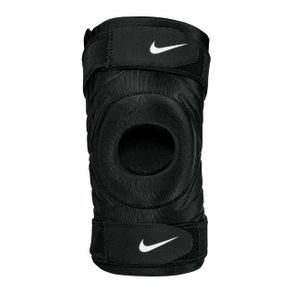

{'question': 'What is the product shown?', 'answer': 'council', 'ground_truth': 'Knee Brace'}


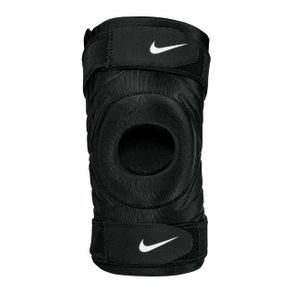

{'question': 'What is the brand of the product shown?', 'answer': 'council', 'ground_truth': 'Nike'}


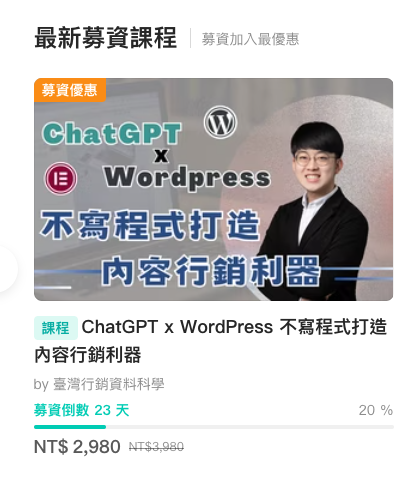

{'question': 'What kind of product is shown?', 'answer': 'chatgpt x wordpress', 'ground_truth': 'An online course'}


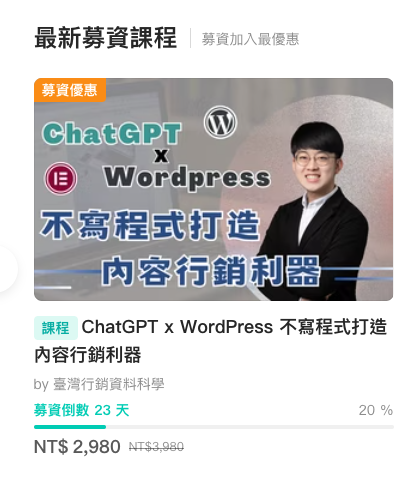

{'question': 'What does the course teach?', 'answer': 'chatgpt x wordpress', 'ground_truth': 'ChatGPT x Wordpress'}


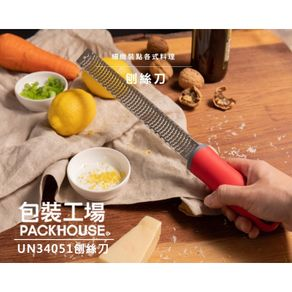

{'question': 'What type of product is shown?', 'answer': 'packhouse', 'ground_truth': '刨絲刀'}


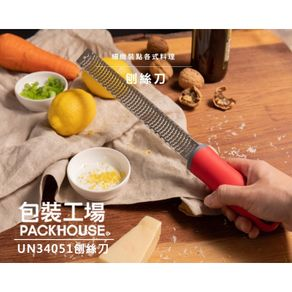

{'question': 'What is the product number?', 'answer': 'un34051', 'ground_truth': 'UN34051'}


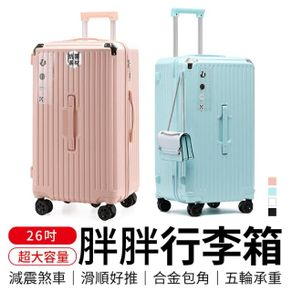

{'question': 'What product is shown?', 'answer': 'belief jr', 'ground_truth': '胖胖行李箱'}


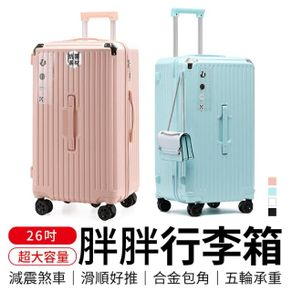

{'question': 'What is the size of the product?', 'answer': '56', 'ground_truth': '26吋'}


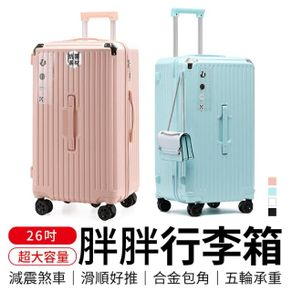

{'question': 'What colors does the product come in?', 'answer': 'b', 'ground_truth': 'Pink and blue'}


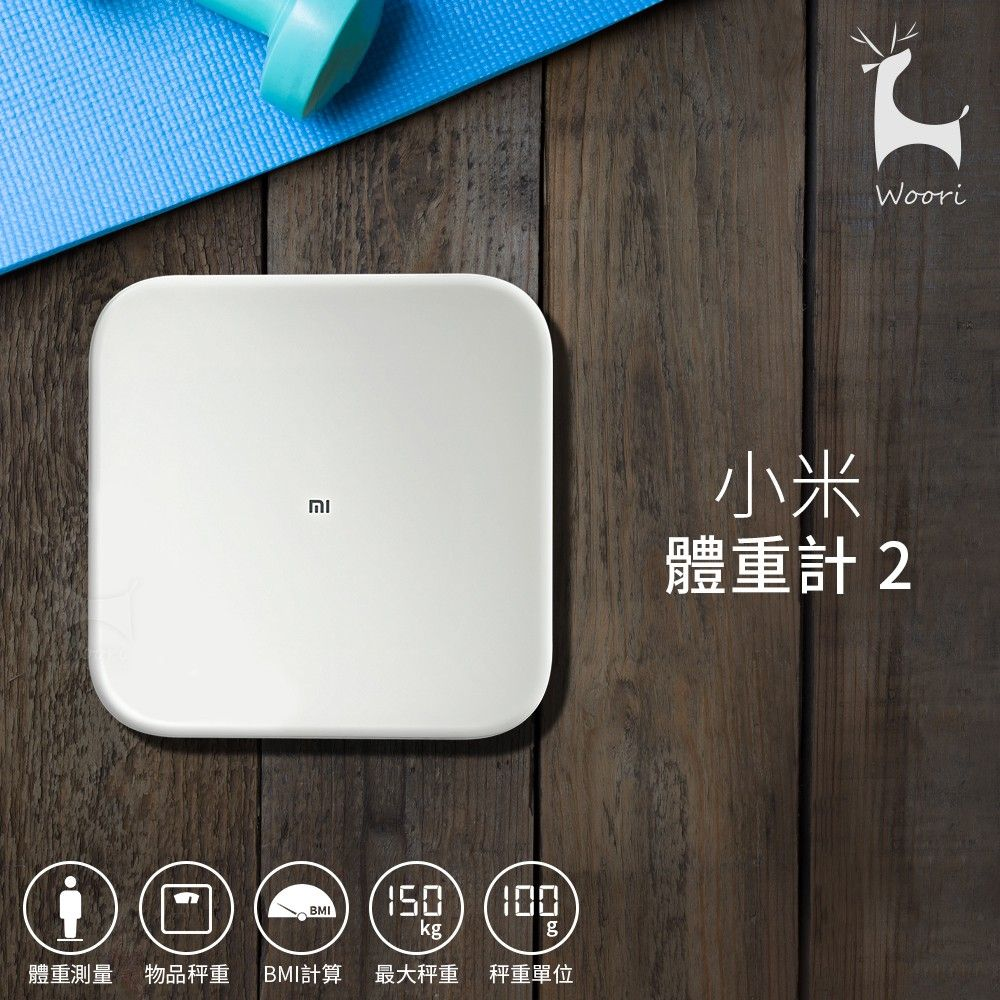

{'question': 'What is the brand of the product shown?', 'answer': 'east 2', 'ground_truth': '小米'}


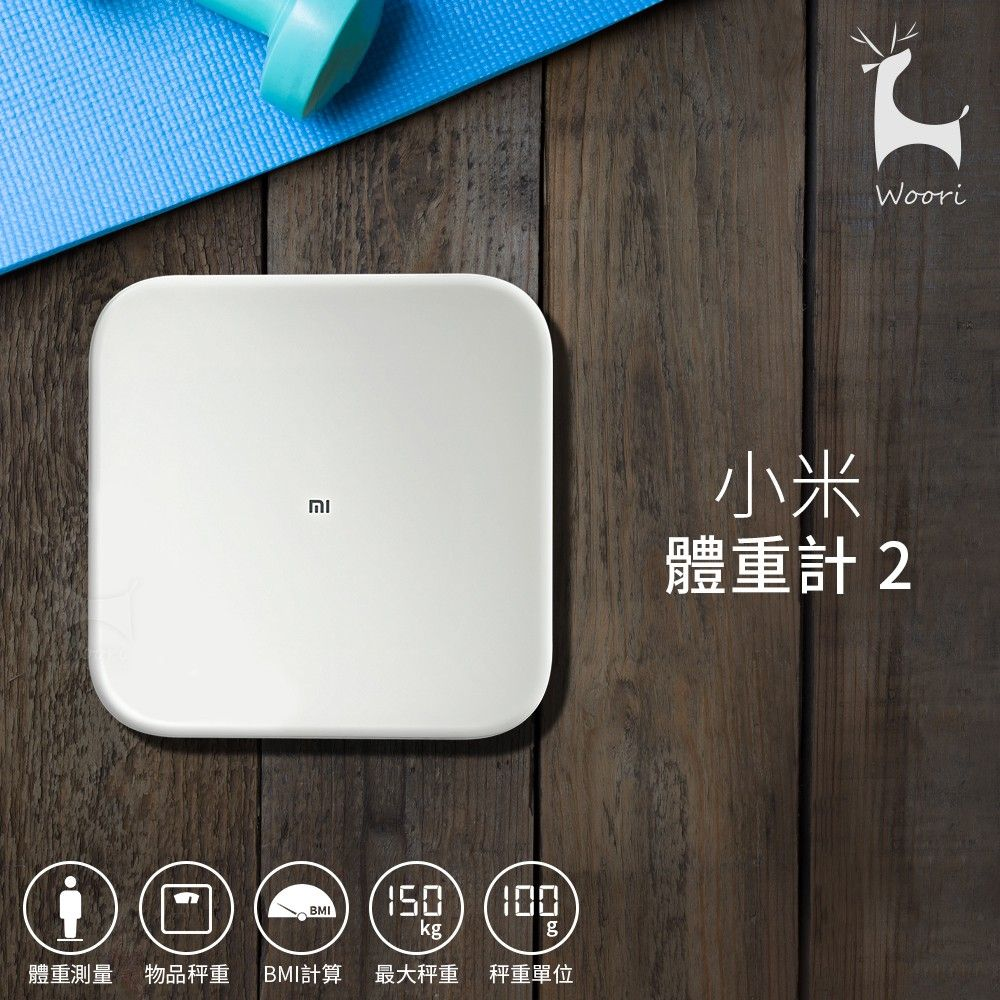

{'question': 'What is the name of the product shown?', 'answer': 'm', 'ground_truth': '體重計2'}


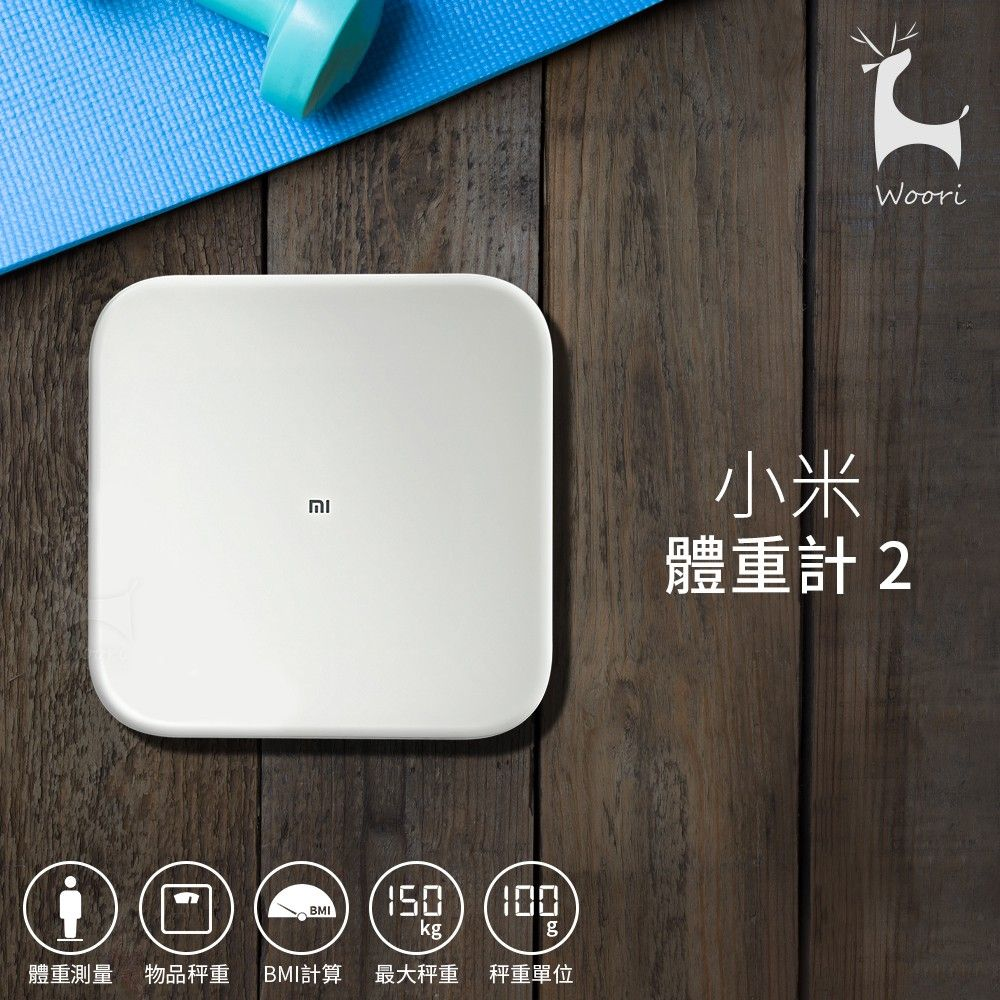

{'question': 'What is the heaviest weight the scale can take?', 'answer': 'weight', 'ground_truth': '150kg'}


In [41]:
for p in json_path:
    img_path = Path(os.path.dirname(p)) / "img.png"
    with open(p) as f:
        sample = json.load(f)
    for item in sample["items"]:
        output = ask(item["q"], img_path, True)
        output.update({"ground_truth": item["a"]})
        print(output)

In [9]:
model.eval()

LitVqaModel(
  (model): VQAModel(
    (img_encoder): ViTModel(
      (embeddings): ViTEmbeddings(
        (patch_embeddings): ViTPatchEmbeddings(
          (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
        )
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (encoder): ViTEncoder(
        (layer): ModuleList(
          (0): ViTLayer(
            (attention): ViTAttention(
              (attention): ViTSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
              )
              (output): ViTSelfOutput(
                (dense): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
              )
            )
            (intermediate): ViTIn

In [ ]:
model.predict()